## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Exploratory Data Analysis
### Checking Missing Data

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Correlation and Visualising between Features

0    549
1    342
Name: Survived, dtype: int64

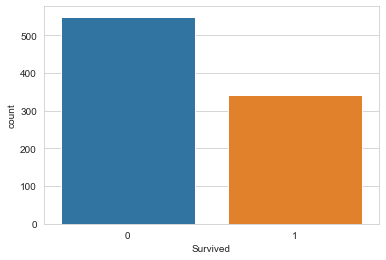

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)
df['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

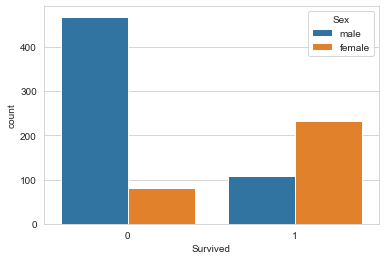

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)
df.groupby('Sex').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

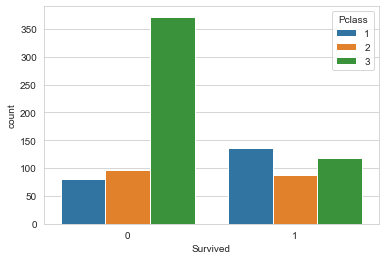

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df)
df.groupby('Pclass').Survived.value_counts()

<AxesSubplot:xlabel='Age'>

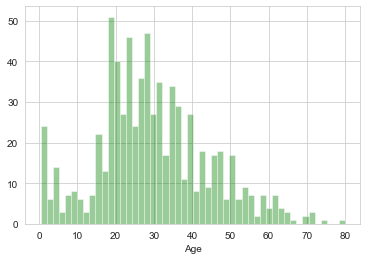

In [8]:
sns.distplot(df['Age'],kde=False,color='green',bins=50)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

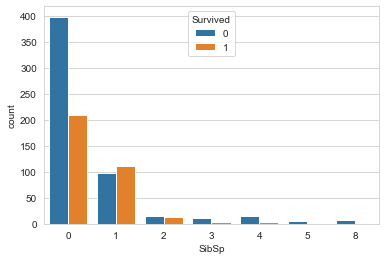

In [15]:
sns.countplot(x='SibSp', hue='Survived',data=df)
df.groupby('SibSp').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

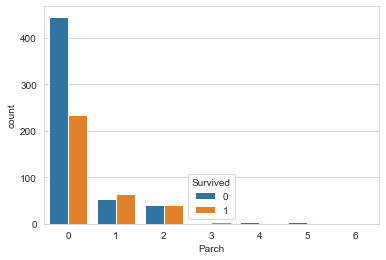

In [17]:
sns.countplot(x='Parch', hue='Survived',data=df)
df.groupby('Parch').Survived.mean()

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

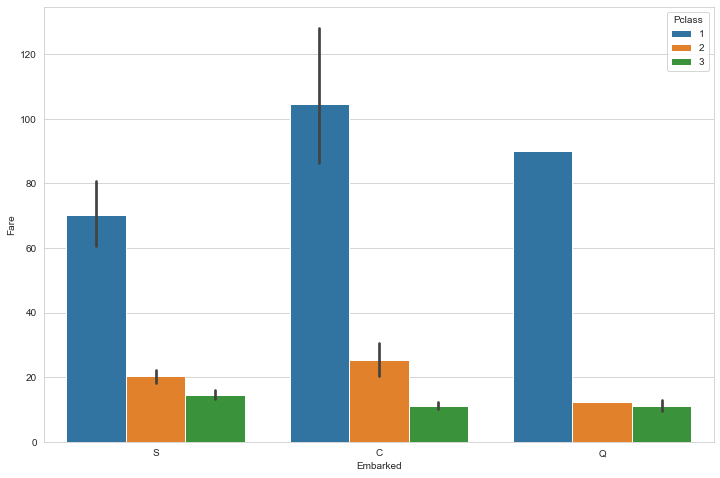

In [11]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Embarked',y='Fare', hue='Pclass', data=df)

In [19]:
df.groupby(['Embarked','Pclass']).Fare.describe()

count        mean        std      min      25%      50%  \
Embarked Pclass                                                            
C        1        85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
         2        17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
         3        66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
Q        1         2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
         2         3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
         3        72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
S        1       127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
         2       164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
         3       353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                        75%       max  
Embarked Pclass                        
C        1       110.883300  512.3292  
         2        37.004200   41.5792  
         3        14.458300   22.3583  
Q        1        90.000000   90.0000  
         2        12.350000   12.3500  
         3        10.218725   29.1250  
S        1        83.475000  263.0000  
         2        26.000000   73.5000  
         3        16.100000   69.5500

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

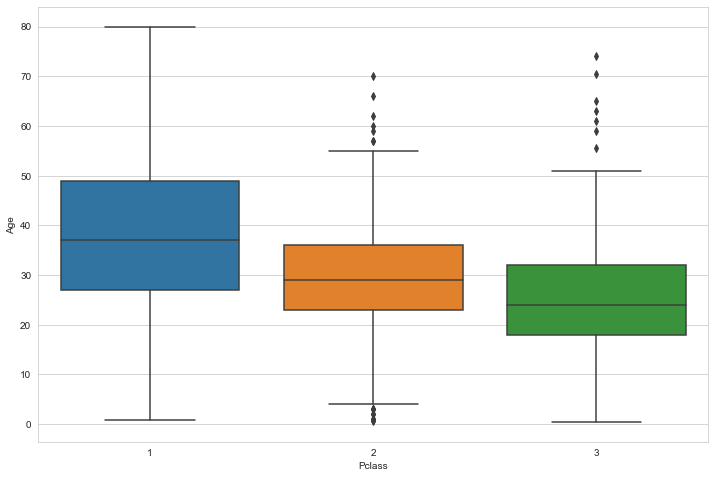

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass',y='Age',data=df)

In [21]:
df.groupby('Pclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [23]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
df['Cabin']=np.where(df['Cabin'].isnull(),"Missing",df['Cabin'])

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [26]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
df['Embarked']=np.where(df['Embarked'].isnull(),df['Embarked'].mode(),df['Embarked'])

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Converting Categorical Features

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [31]:
df = pd.concat([df,sex,embark],axis=1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,1,0,1


### Dropping columns which aren't needed for testing.

In [33]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

## Modelling

### Train-Test Split 

In [34]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], 
                                                    test_size=0.3, 
                                                    random_state=150)

### Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [41]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
acc_lr = accuracy_score(y_test,predictions)
acc_lr

0.8544776119402985

In [40]:
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
acc_svm =acc_lr = accuracy_score(y_test,predictions)
acc_svm

0.6156716417910447

In [42]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test,predictions)
acc_rfc

0.835820895522388

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
acc_knn = accuracy_score(y_test,predictions)
acc_knn

0.6305970149253731

In [44]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,predictions)
acc_gnb

0.7985074626865671

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test,predictions)
acc_dtc

0.7723880597014925

In [47]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  'Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_lr, 
              acc_rfc, acc_gnb, acc_dtc]})
models.sort_values(by='Score', ascending=False, )

,Model,Score
2,Logistic Regression,0.854478
3,Random Forest,0.835821
4,Naive Bayes,0.798507
5,Decision Tree,0.772388
1,KNN,0.630597
0,Support Vector Machines,0.615672


## Model Evaluation

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       158
           1       0.74      0.68      0.71       110

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

